In [1]:
import pandas as pd
df = pd.read_csv('../../data/preprocessed_AQI_data.csv')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,10126,51,2,1,0,36,0,0,0,51,2,44.7444,44.2031
1,22,10140,41,0,1,0,5,0,1,0,41,0,-5.2900,-44.4900
2,75,10163,66,2,1,0,39,0,2,0,66,2,37.1667,15.1833
3,123,10185,34,0,1,0,34,0,0,0,20,0,53.0167,20.8833
4,166,10243,54,2,1,0,14,0,11,0,54,2,16.1005,-88.8074


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(["AQI Category"], axis=1)
y = df["AQI Category"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=22
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2845, 13) (11384, 13)
(2845,) (11384,)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [7]:
lgr = LogisticRegression(max_iter=1000)

In [8]:
lgr.fit(X_train, y_train)

# Predict on the test set
y_pred = lgr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      5332
           1       0.36      0.75      0.49        36
           2       0.71      0.80      0.75      4679
           3       0.41      0.55      0.47       633
           4       0.31      0.13      0.19       604
           5       0.03      0.02      0.02       100

    accuracy                           0.73     11384
   macro avg       0.45      0.51      0.46     11384
weighted avg       0.73      0.73      0.73     11384



/home/wissem/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.model_selection import GridSearchCV

# hyperparams tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100,200, 500 ]
}


# grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Use the best model
# best_model = grid_search.best_estimator_


Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [14]:
lgr_ = LogisticRegression(max_iter=100, C=1, penalty='l1', solver='liblinear')
lgr_.fit(X_train, y_train)

# Predict on the test set
y_pred = lgr_.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5332
           1       0.92      0.97      0.95        36
           2       0.96      0.98      0.97      4679
           3       0.88      0.98      0.93       633
           4       0.96      0.70      0.81       604
           5       0.96      0.22      0.36       100

    accuracy                           0.97     11384
   macro avg       0.94      0.81      0.83     11384
weighted avg       0.97      0.97      0.96     11384



In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

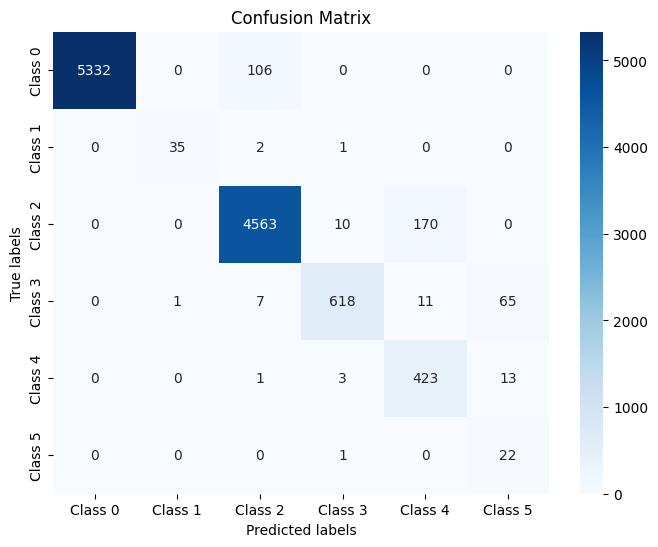

In [18]:
conf_matrix = confusion_matrix(y_pred, y_test)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()